In [19]:
import sys
!{sys.executable} -m pip install ipynb

import warnings
warnings.filterwarnings('ignore')


You should consider upgrading via the 'c:\users\gampl\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [20]:
%%capture

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.CleaningData import getDataset
from ipynb.fs.full.CleaningData import getCovarianceVector
from sklearn.model_selection import train_test_split
from copy import deepcopy

pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", None)

In [21]:
%%time
df = getDataset(500)


Deleting nb_at as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_or as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_tilde as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_percent as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_star as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_comma as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_semicolumn as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_dollar as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_space as there is only n amount of numbers for the feature, where n < threshold


Deleting nb_dslash as there is only n amount of numbers for the feature, where n < threshold


Deleting http_in_path as there is only n amount of number

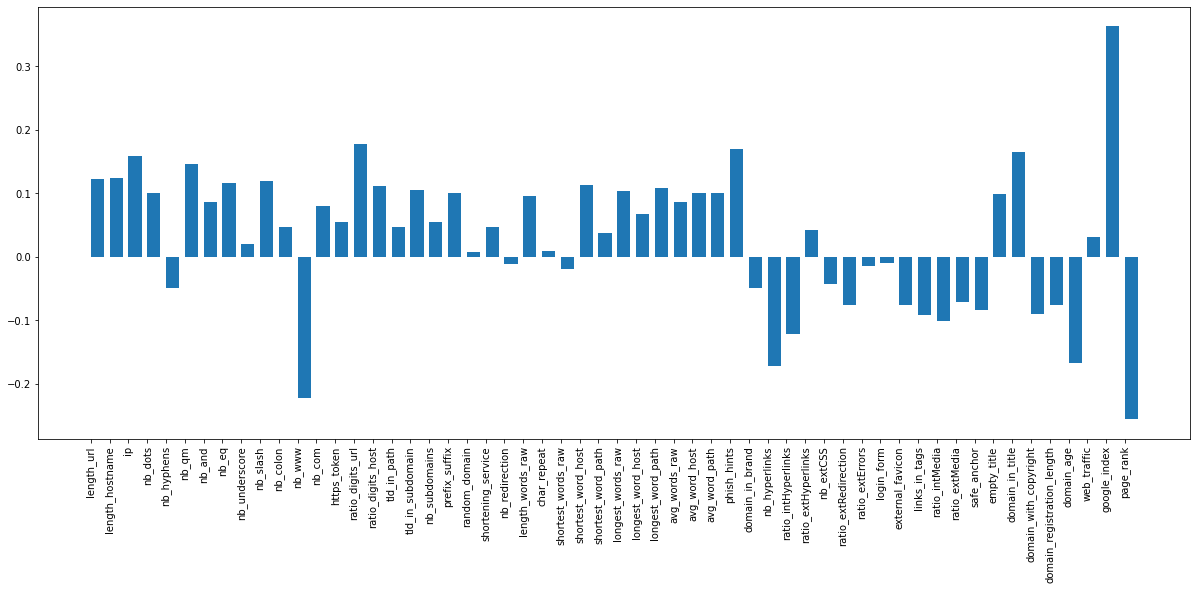

Wall time: 644 ms


In [22]:
%%time
covVec = getCovarianceVector(df)

fig = plt.figure(figsize=(16, 6)) # the figsize changes the width and height respectively
ax = fig.add_axes([0,0,1,1])
langs = covVec.index
students = covVec
ax.bar(langs,students, align='edge', width=0.7) #width determines width of bars
plt.xticks(rotation = 90) 
plt.show()

In [23]:
# Seperating and storing y values (Status Feature)

df.head(10)

statusColumn = df['status']
del df['status']
urlColumn = df['url']
del df['url']

# Printing the feature set

print(df.columns)

# Storing the number of features

numFeatures = (len(df.columns)) 
print(numFeatures)

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_qm',
       'nb_and', 'nb_eq', 'nb_underscore', 'nb_slash', 'nb_colon', 'nb_www',
       'nb_com', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
       'tld_in_path', 'tld_in_subdomain', 'nb_subdomains', 'prefix_suffix',
       'random_domain', 'shortening_service', 'nb_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks',
       'nb_extCSS', 'ratio_extRedirection', 'ratio_extErrors', 'login_form',
       'external_favicon', 'links_in_tags', 'ratio_intMedia', 'ratio_extMedia',
       'safe_anchor', 'empty_title', 'domain_in_title',
       'domain_with_copyright', 'domain_registration_length', 'domain_

In [24]:
theta = np.random.uniform(-0.5,0.5,numFeatures) # Initialising random theta values
origTheta = theta # Keeping a copy of original theta values 

# Splitting data into test, validation and train
trainX, testX, trainY, testY = train_test_split(df, statusColumn, test_size=0.15)
trainX, validationX, trainY, validationY = train_test_split(trainX, trainY, test_size=0.2)


In [25]:
%%time
def sigmoid(x,k): #Sigmoid function
    
    if(k==0):
        f = 1
    else:
        f = k
    return 1/(1+np.exp(-f*x))

def prediction(theta, x, k): #IPrediction function
    return sigmoid(np.matmul(np.transpose(theta),x),k)

def LogisticRegression(trainX, trainY, theta, a, regularisation): # Logistic Regression Algorithm
    alpha = a
    newTheta = theta
    strengthOfRegularisation = regularisation
    count = 0

    while(count < 10):
        oldTheta = newTheta
        for i in trainX.index:
            for j in range(numFeatures):
                newTheta[j] = newTheta[j] + alpha*(trainY.loc[i] - prediction(newTheta,trainX.loc[i],strengthOfRegularisation))*(trainX.loc[i][j]) + alpha*strengthOfRegularisation*newTheta[j]
        count = count + 1
        
    return newTheta

def calculateAccuracy(x,y,theta,confusionMatrix, k): # Calculates the accuracy and create the confusion matrix
    numberCorrect = 0
    numberIncorrect = 0

    for i in range(len(testY)):
        
        predicted_result = round(prediction(newTheta,testX.iloc[i], k))
        
        if(predicted_result == 1 and testY.iloc[i] == 0):
            confusionMatrix[0] = confusionMatrix[0] + 1
        else:
            if (predicted_result == 0 and testY.iloc[i] == 1):
                confusionMatrix[1] = confusionMatrix[1] + 1
            else:
                if(predicted_result == 1 and testY.iloc[i] == 1):
                    confusionMatrix[2] = confusionMatrix[2] + 1
                else:
                    if(predicted_result == 0 and testY.iloc[i] == 0):
                        confusionMatrix[3] = confusionMatrix[3] + 1
                    
        if(predicted_result == testY.iloc[i]):
            numberCorrect = numberCorrect + 1
        else:
            numberIncorrect = numberIncorrect + 1
            
    averageCorrect = numberCorrect/len(testY)
    averageIncorrect = numberIncorrect/len(testY)
    
    return averageCorrect*100, averageIncorrect*100, confusionMatrix


Wall time: 0 ns


In [26]:
%%time

results = [] # Matrix to store validation results
confusionMatrix = [0,0,0,0] # Confusion Matrix
alphaArray = [0.01, 0.001, 0.0001] # Alpha Values
regularisationArray = [0, 0.001, 0.002, 0.01, 0.03] # Regularisation values
newTheta = []

theta = np.random.uniform(-0.5,0.5,numFeatures) # Initialising random theta values
origTheta = deepcopy(theta) # Keeping a copy of original theta values 

# Obtaining the optimal hyperparameters by getting the accuracy and confusion matrix for each hyperparameter

r = 0
for i in range(3):
    for j in range(5):
        newTheta = LogisticRegression(validationX, validationY, theta, alphaArray[i], regularisationArray[j])
        results.append(calculateAccuracy(testX,testY,newTheta,confusionMatrix, 0))
        print("Alpha = ",alphaArray[i])
        print("Regularisation = ", regularisationArray[j])
        print("==============================================")
        print("Confusion Matrix",'\n' )
        print(results[r][2][2],"   ",results[r][2][1] )
        print(results[r][2][0],"   ",results[r][2][3] )
        print("==============================================")
        print("Percentage Correct : ", results[r][0])
        print("Percentage Incorrect : ", results[r][1])
        print("==============================================",'\n')
        theta = deepcopy(origTheta) 
        r = r + 1
        confusionMatrix = [0,0,0,0]

Alpha =  0.01
Regularisation =  0
Confusion Matrix 

815     78
33     797
Percentage Correct :  93.55774811375508
Percentage Incorrect :  6.4422518862449225

Alpha =  0.01
Regularisation =  0.001
Confusion Matrix 

739     154
57     773
Percentage Correct :  87.7539175856065
Percentage Incorrect :  12.2460824143935

Alpha =  0.01
Regularisation =  0.002
Confusion Matrix 

748     145
55     775
Percentage Correct :  88.39233894370284
Percentage Incorrect :  11.607661056297156

Alpha =  0.01
Regularisation =  0.01
Confusion Matrix 

784     109
51     779
Percentage Correct :  90.71387115496228
Percentage Incorrect :  9.286128845037725

Alpha =  0.01
Regularisation =  0.03
Confusion Matrix 

787     106
41     789
Percentage Correct :  91.4683691236216
Percentage Incorrect :  8.53163087637841

Alpha =  0.001
Regularisation =  0
Confusion Matrix 

806     87
31     799
Percentage Correct :  93.15147997678469
Percentage Incorrect :  6.848520023215323

Alpha =  0.001
Regularisation =  0.

In [28]:
%%time
trainingResults = []
confusionMatrix = [0,0,0,0]
newTheta = []

theta = np.random.uniform(-0.5,0.5,numFeatures) # Initialising random theta values
origTheta = deepcopy(theta) # Keeping a copy of original theta values 

# Obtaining the optimal values for theta by getting the accuracy and confusion matrix using the tuned hyperparameters

newTheta = LogisticRegression(trainX, trainY, theta, 0.01, 0)
trainingResults.append(calculateAccuracy(trainX, trainY, newTheta, confusionMatrix, 0))

Wall time: 13min 19s


In [30]:
%%time
# Obtaining the test results by using new data on the model with trained theta values
confusionMatrix = [0,0,0,0]

testResults = []
testResults.append(calculateAccuracy(testX, testY, newTheta, confusionMatrix, 0))
print("Alpha = ",0.01)
print("Regularisation = ", 0)
print("==============================================")
print("Confusion Matrix",'\n' )
print(testResults[0][2][2],"   ",testResults[0][2][1] )
print(testResults[0][2][0],"   ",testResults[0][2][3] )
print("==============================================")
print("Percentage Correct : ", testResults[0][0])
print("Percentage Incorrect : ", testResults[0][1],)
print("==============================================",'\n')


Alpha =  0.01
Regularisation =  0
Confusion Matrix 

820     73
34     796
Percentage Correct :  93.78990133488102
Percentage Incorrect :  6.210098665118979

Wall time: 184 ms
